#### `Выполнил: Евсеев Елисей , 07.04.2022`





> # **Домашнее задание №4**.

### **Задача 3**

Постройте два доверительных интервала для среднего $a$ (не для нормальной модели):
один с известной дисперсией $\sigma^2$, другой с оцененной по выборке $\sigma_n^2$.

* Исследуйте с какой вероятностью среднее значение попадает в доверительный интервал.

* Исследуйте поведение ширины доверительных интервалов при 𝑛, стремящимся к бесконечности.





In [ ]:
from math import sqrt
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd

import seaborn as sns
import scipy 

%matplotlib inline

In [ ]:
np.random.seed(42)

Для случая, когда исходное распределение является ненормальным, можно использовать ЦПТ для интервального оценивания по интервалам для нормального распределения.

$$\sqrt{n}\frac{\overline{X}_n - \mu}{\sigma} \to N(0,1)$$

Пусть в нашем случае будет распределение Пуассона.

$$P(\lambda)=\frac{\lambda^k e ^{-k}}{k!}$$

 Тогда для него мы можем построить асимптотический доверительный интервал (ДИ).

Для начала получим выборку объема $n=10000$, сгенерировав её из распределения Пуассона с параметром $\lambda = 5$, для него $a=5$, $\sigma^2=5$.



In [ ]:
def generate_poisson_selection(n=10000, lambda_parameter=5.0):
    return np.random.poisson(lambda_parameter, n)

# example with size = 10
print(f"Example: {generate_poisson_selection(10)}")

Example: [7 2 4 4 7 7 2 4 4 3]


Построим ДИ уровня $\gamma = 0.95$:

$$a \in (\overline{X}-\frac{x_\gamma \sigma}{\sqrt{n}};\overline{X}+\frac{x_\gamma \sigma}{\sqrt{n}})$$

где $x_\gamma = z_{\frac{\gamma +1}{2}}$ - соотвествующий квантиль нормального распределения. 

$z_{0.95 + 1/2} = 1.96$. 

$$a\in (\overline{X}-0.044; \overline{X}+0.044)$$

Такой асимптотический ДИ соотвествует конкретной выборке $X_1...X_n$, тогда мы сгенерируем выборку $k$ раз и построим для каждой выборки свой ДИ для того чтобы, проверить попадает ли туда $a=5$ (для распределения Пуассона нам уже известно его среднее - оно равно $\lambda$ параметру). Так мы найдем вероятность попадания среднего в доверительный интервал.

In [ ]:
def probability_of_interval(n=10000, x_gamma=1.96, variance=5.0, k=1000, 
                            lambda_parameter=5.0):
    k_selections_mean = []
    for _ in range(k):
        poisson_selection = generate_poisson_selection(n, lambda_parameter)
        k_selections_mean.append(np.mean(poisson_selection))

    edges = x_gamma * sqrt(variance) / sqrt(n)
    is_interval = [i for i in k_selections_mean if i - edges <= 5.0 
                   <= i + edges]
    if not is_interval:
        return 0.0
    print(f"First 10 mean values: {k_selections_mean[:15]}")
    print("Probability equals: ", end="")
    return len(is_interval) / k



In [ ]:
probability_of_interval()

First 10 mean values: [5.0532, 5.0042, 4.9945, 4.9954, 5.0176, 5.0203, 5.002, 5.0358, 5.0208, 5.0506, 4.9985, 5.0244, 4.9707, 5.0209, 5.0317]
Probability equals: 

0.958

Как видим $Pr=0.958$ то есть с заданной вероятностью ($\gamma = 0.95$) действительно попадает в интервал.

Теперь сделаем то же самое для распределения Пуассона с оценненой по выборке дисперсией $\sigma_n^2$ по формуле:

$$\sigma_n^2=\frac{1}{n}\sum_{i=0}^n(X_i-\overline{X})^2$$

In [ ]:
def count_selection_variance(X_n, mean):
    if len(X_n) == 0:
        return 0.0
    values = [(i - mean)**2 for i in X_n]
    return sum(values) / len(X_n)

In [ ]:
def probability_of_interval_unknown_var(n=10000, x_gamma=1.96, k=1000, 
                            lambda_parameter=5.0):
    count = 0
    for _ in range(k):
        poisson_selection = generate_poisson_selection(n, lambda_parameter)
        mean = np.mean(poisson_selection)
        variance = count_selection_variance(poisson_selection, mean)
        edges = x_gamma *sqrt(variance) / sqrt(n)

        if mean - edges <= 5.0 <= mean + edges:
            count += 1
   
    print("In case of unknown variance\n Probability equals: ", end='')
    return count / k



In [ ]:
probability_of_interval_unknown_var()

In case of unknown variance
 Probability equals: 

0.947

Видим, что вероятность несущественно уменьшилась, однако она по-прежнему близка к $\gamma = 0.95$.

Теперь исследуем ширину ДИ при $\gamma=0.95$ и увеличении $n$, считая для каждого $n$ $k$ интервалов и взяв их среднюю ширину (в случае с известной дисперсией ширина будет одинакова при равном $n$).

In [ ]:
def interval_width(n, x_gamma=1.96, variance=5.0, k=100,
                            lambda_parameter=5.0, unknown_var=False):
    interval_widths = []
    for i in range(k):
        poisson_selection = generate_poisson_selection(n, lambda_parameter)
        if unknown_var:
            mean = np.mean(poisson_selection)
            variance = count_selection_variance(poisson_selection, mean)
            
        edges = x_gamma * sqrt(variance) / sqrt(n)
        interval_widths.append(2 * edges)
    
    if not interval_widths:
        return 0.0
    return np.mean(interval_widths)

100%|██████████| 1000/1000 [02:35<00:00,  6.42it/s]


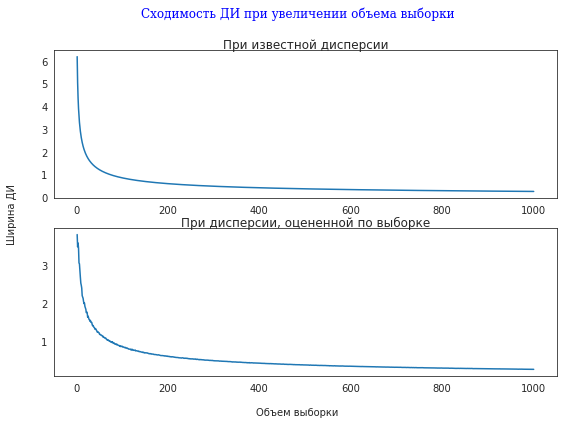

In [ ]:
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
sns.set_style("white")

x_axis = []
y_var_axis = []
y_unknown_var_axis = []

for i in tqdm(range(2, 1002)):
    x_axis.append(i)
    y_var_axis.append(interval_width(i))
    y_unknown_var_axis.append(interval_width(i, unknown_var=True))


ax1.plot(x_axis, y_var_axis)
ax2.plot(x_axis, y_unknown_var_axis)

fig.text(0.5, 0.04, 'Объем выборки', ha='center', va='center')
fig.text(0.06, 0.5, 'Ширина ДИ', ha='center', va='center', 
         rotation='vertical')

ax1.set_title('При известной дисперсии', pad=1)
ax2.set_title('При дисперсии, оцененной по выборке', pad=1)


fig.suptitle("Сходимость ДИ при увеличении объема выборки", 
          fontdict = {'family':'serif','color':'blue','size':14})
plt.show()

Таким образом, видим, что ширина интервала при увеличении $n$ в обоих случаях, как и ожидалось, уменьшается и стремится к $0$ со скоростью $\frac{1}{\sqrt{n}}$.